In [ ]:
import os
import pandas as pd

# Đường dẫn tới file đã tiền xử lý
input_path = 'processed_data/preprocessed_dataset.csv'

# Thư mục đích để lưu các file theo năm
output_dir = 'processed_data/by_year'
os.makedirs(output_dir, exist_ok=True)

# Đọc dữ liệu
df = pd.read_csv(input_path)

# Lặp qua từng năm và lưu file tương ứng
for year, group in df.groupby('year'):
    out_path = os.path.join(output_dir, f'{year}.csv')
    group.to_csv(out_path, index=False)
    print(f"Saved {len(group)} records for year {year} → {out_path}")

In [1]:
import pandas as pd
import os

# Đọc dữ liệu đã xử lý
input_path = 'processed_data/preprocessed_dataset.csv'
df = pd.read_csv(input_path)

# Tạo thư mục đầu ra
output_dir = 'processed_data/3_groups'
os.makedirs(output_dir, exist_ok=True)

# Định nghĩa các nhóm năm
groups = {
    '2017_2015': df[df['year'].between(2015, 2017)],
    '2014_2012': df[df['year'].between(2012, 2014)],
    'others': df[~df['year'].between(2012, 2017)],
}

# Lưu từng nhóm vào file
for name, group in groups.items():
    out_path = os.path.join(output_dir, f'{name}.csv')
    group.to_csv(out_path, index=False)
    print(f"Saved {len(group)} records → {out_path}")


Saved 5294 records → processed_data/3_groups\2017_2015.csv
Saved 4580 records → processed_data/3_groups\2014_2012.csv
Saved 6073 records → processed_data/3_groups\others.csv


In [2]:
import pandas as pd

# Đường dẫn thư mục chứa các file đã chia
base_path = 'processed_data/3_groups'

# Đọc 3 file vào 3 DataFrame
df_2017_2015 = pd.read_csv(f'{base_path}/2017_2015.csv')
df_2014_2012 = pd.read_csv(f'{base_path}/2014_2012.csv')
df_others = pd.read_csv(f'{base_path}/others.csv')

# Kiểm tra nhanh số lượng bản ghi của từng nhóm
print("2017–2015:", df_2017_2015.shape)
print("2014–2012:", df_2014_2012.shape)
print("Others    :", df_others.shape)


2017–2015: (5294, 11)
2014–2012: (4580, 11)
Others    : (6073, 11)


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
def plot_histograms(df, columns, figsize=(15, 12), bins_method='sqrt'):
    """
    Plot histograms for continuous columns in the DataFrame.

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        columns (list): List of column names to plot histograms for.
        figsize (tuple): Figure size (default is (15, 12)).
        bins_method (str): Method for calculating bins using numpy.histogram_bin_edges() (default is 'sqrt').

    Returns:
        None (Displays the plots).
    """
    plt.figure(figsize=figsize)

    for index, col in enumerate(columns):
        plt.subplot(2, 2, index + 1)
        
        # Convert column to numeric type, removing invalid values
        data = pd.to_numeric(df[col], errors='coerce').dropna()
        
        # Compute bin edges using the specified method
        bin_edges = np.histogram_bin_edges(data, bins=bins_method)
        num_bins = len(bin_edges) - 1  # Actual number of bins
        
        # Plot histogram with the calculated number of bins
        sns.histplot(data=data, bins=num_bins, color=sns.color_palette('pastel')[index], kde=True)
        
        plt.title(col.replace('_', ' ').capitalize(), fontsize=14, pad=10)
        plt.xlabel(col.replace('_', ' ').capitalize(), fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tick_params(axis='both', labelsize=10)

    plt.tight_layout()
    plt.show()


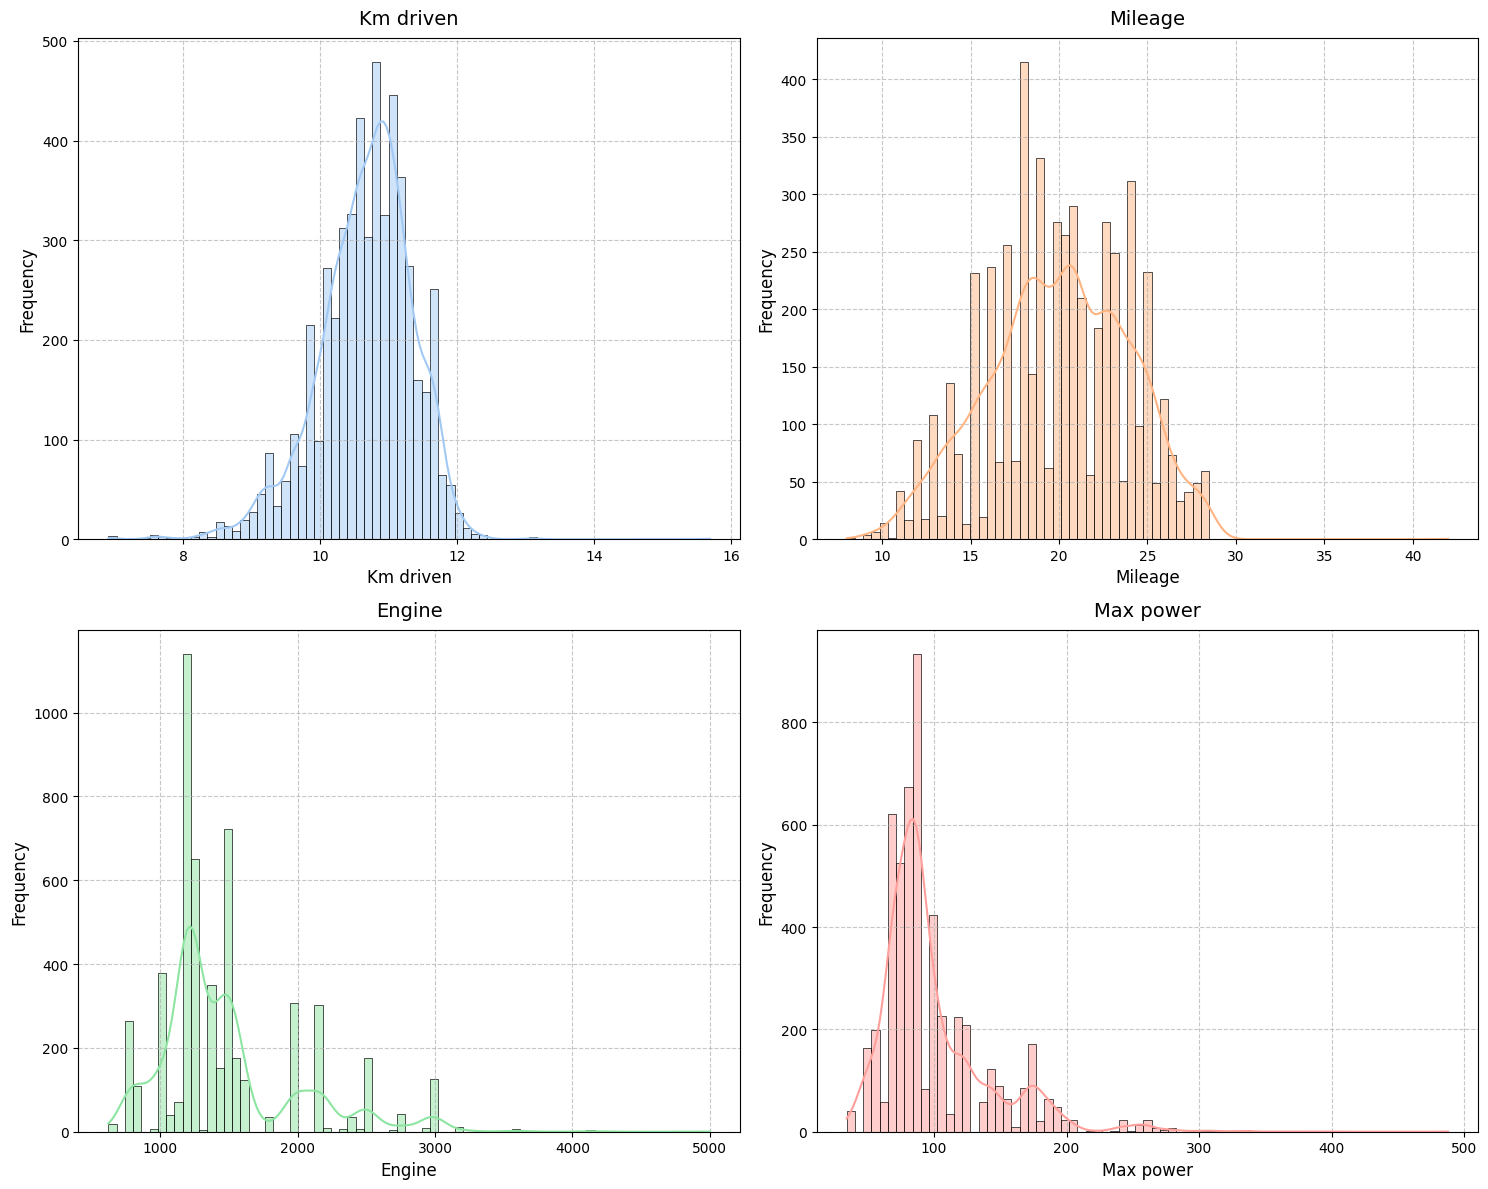

In [6]:
continuous_raw_columns = ['km_driven', 'mileage', 'engine', 'max_power']
plot_histograms(df_2017_2015, continuous_raw_columns)

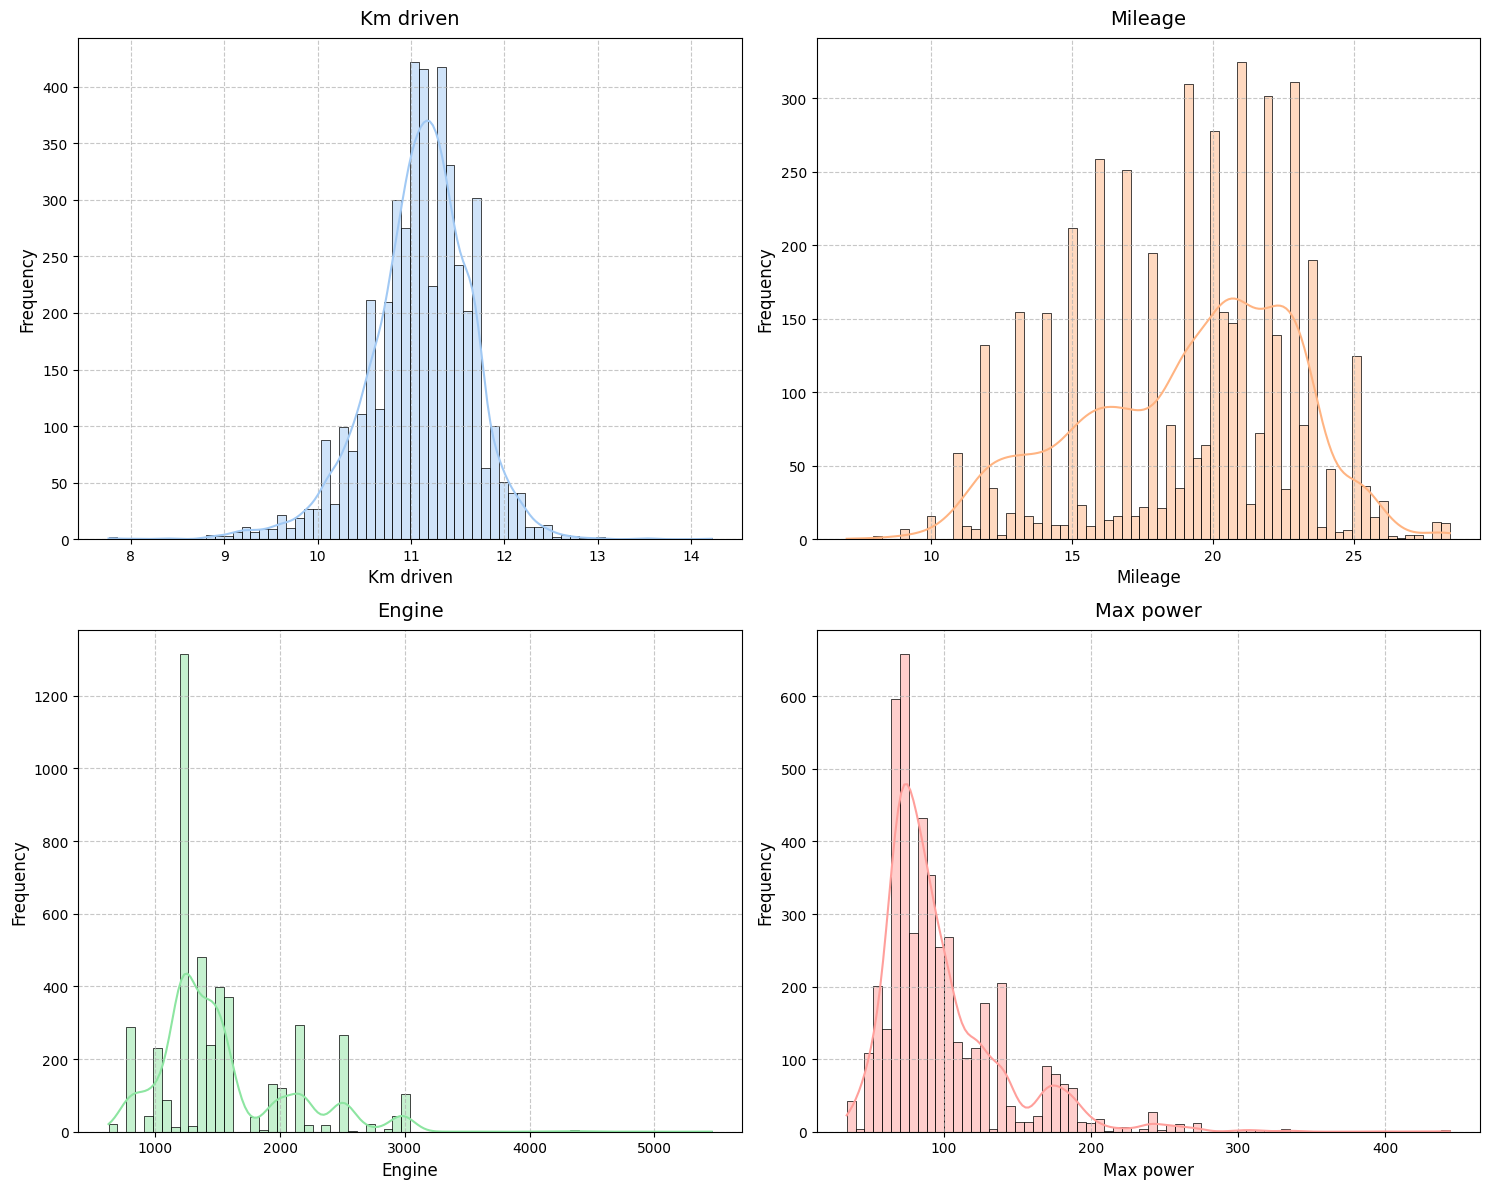

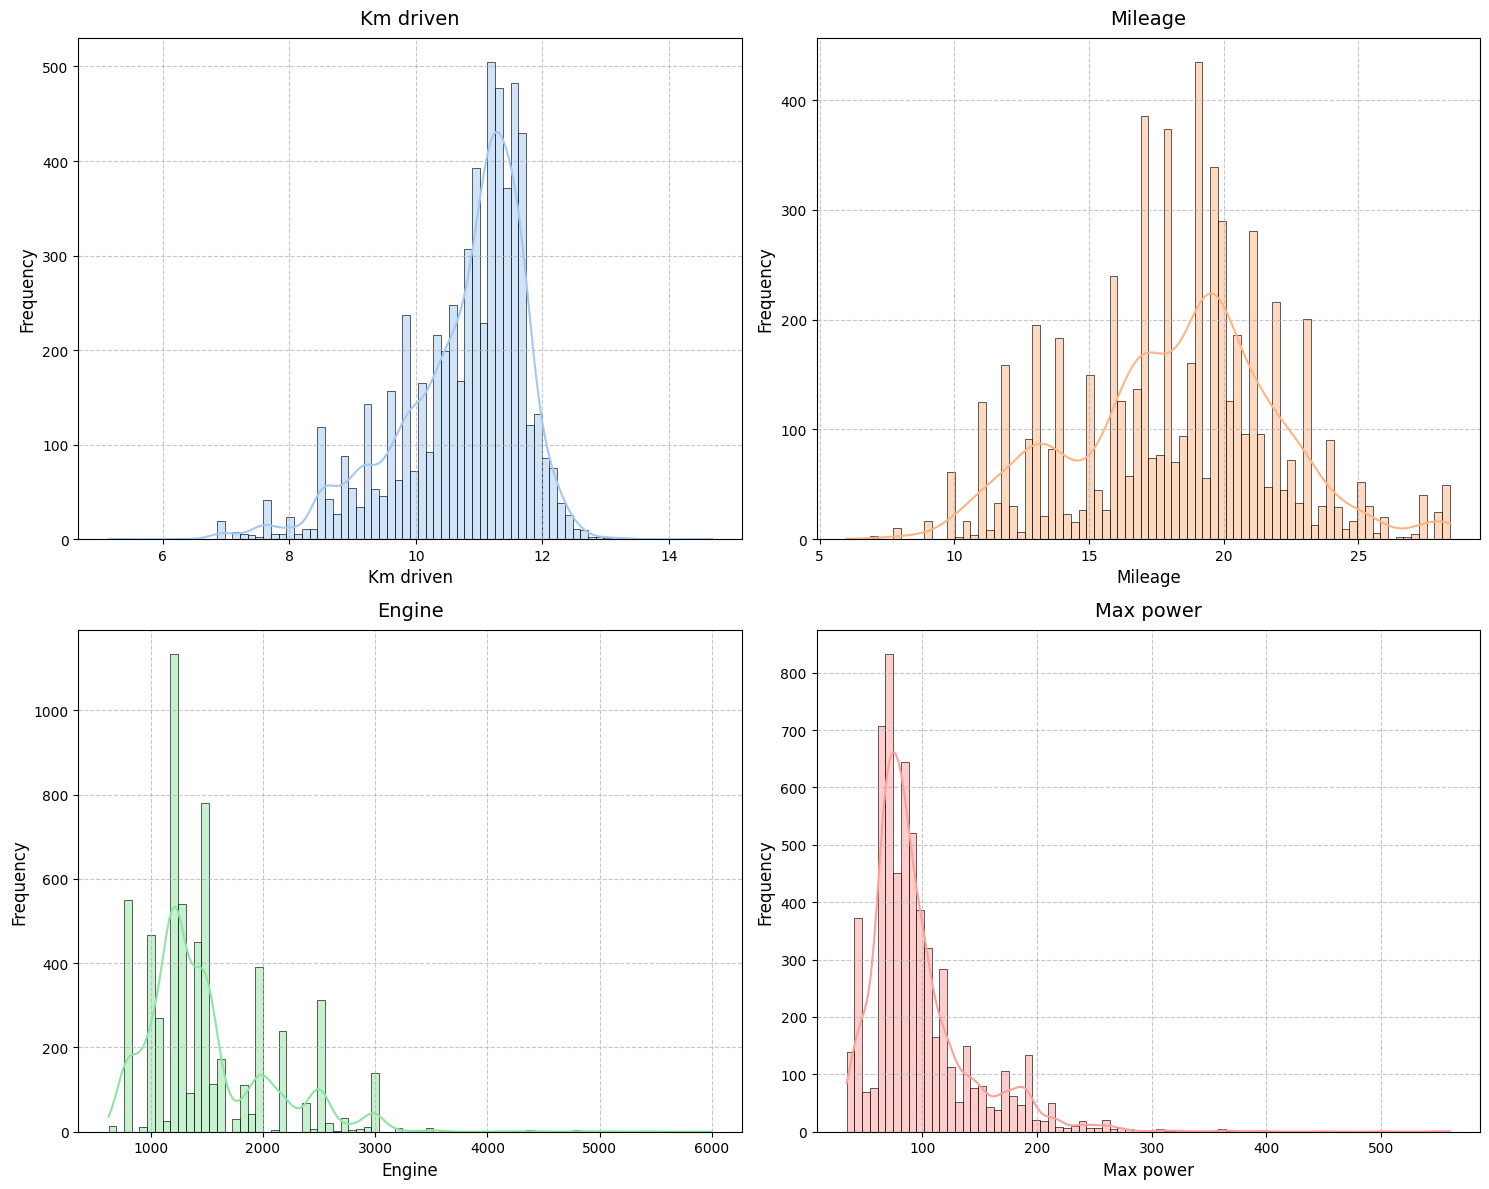

In [7]:
plot_histograms(df_2014_2012, continuous_raw_columns)
plot_histograms(df_others, continuous_raw_columns)

In [8]:
def draw_correlation_matrix(df, figsize=(12, 10)):
    """
    Draw a correlation matrix for the specified columns in the DataFrame.

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        columns (list): List of column names to include in the correlation matrix.
        figsize (tuple): Figure size (default is (12, 10)).

    Returns:
        None (Displays the plot).
    """
    plt.figure(figsize=figsize)
    
    # Calculate the correlation matrix
    correlation_matrix = df.corr()
    
    # Plot the heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='Blues', 
                annot_kws={"size": 10}, linewidths=0.5, fmt=".2f")
    
    plt.title('Correlation Matrix', fontsize=20)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.tight_layout()
    plt.show()



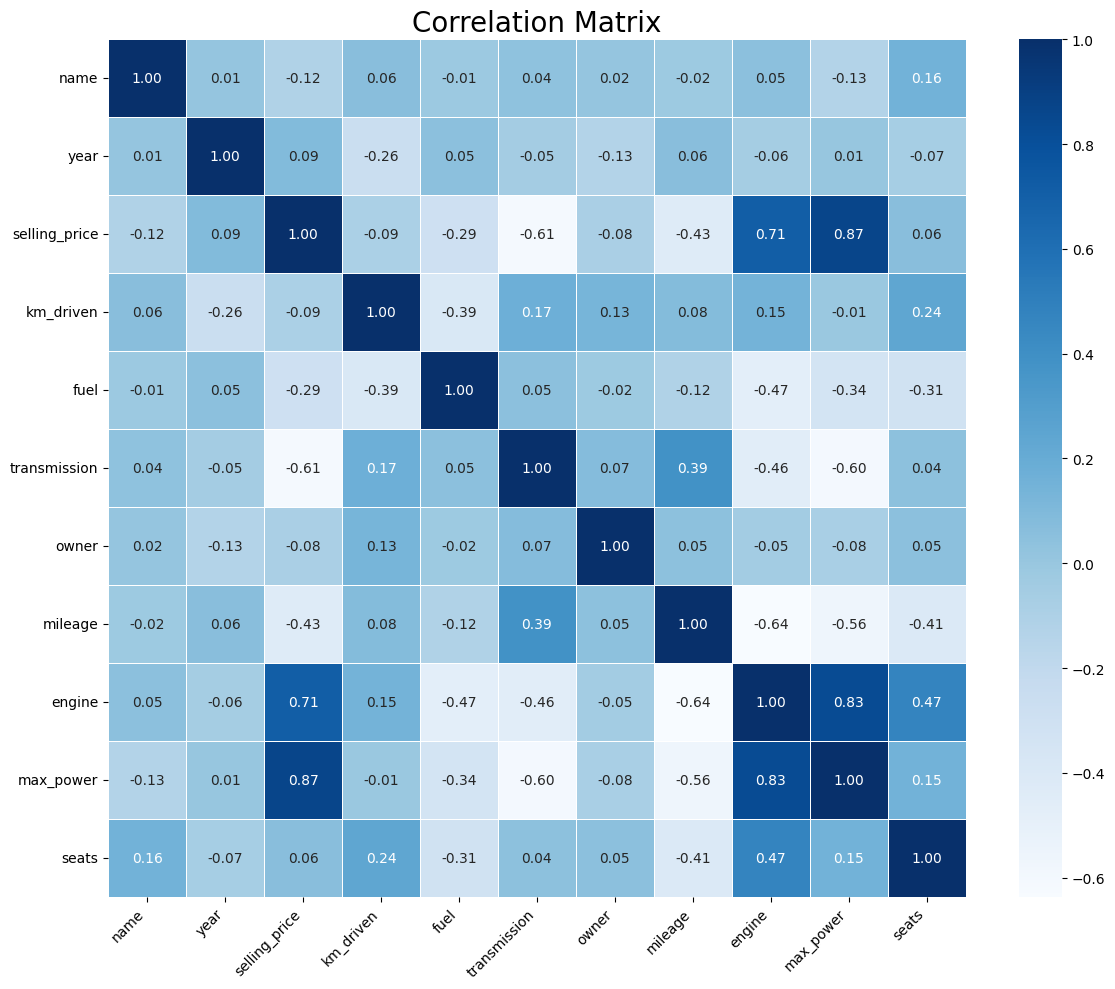

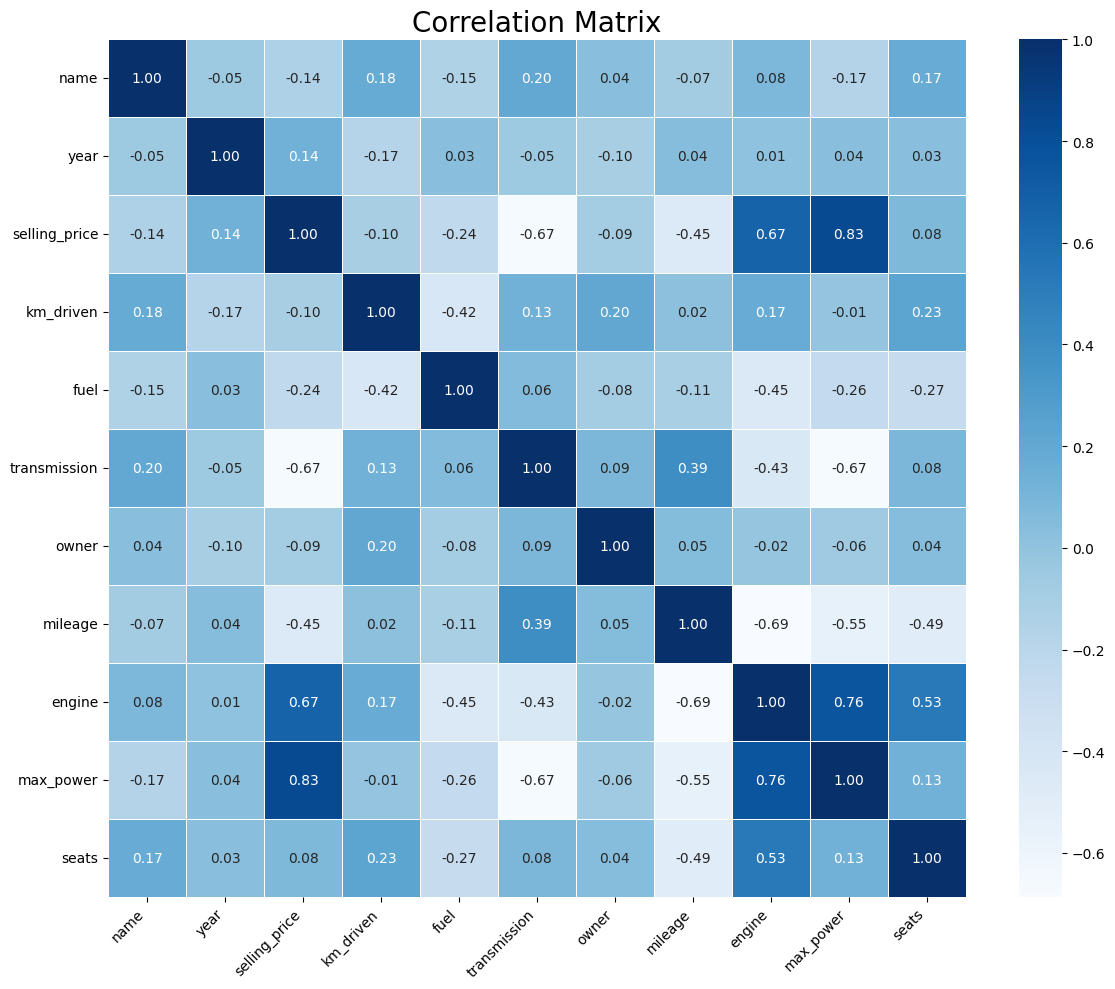

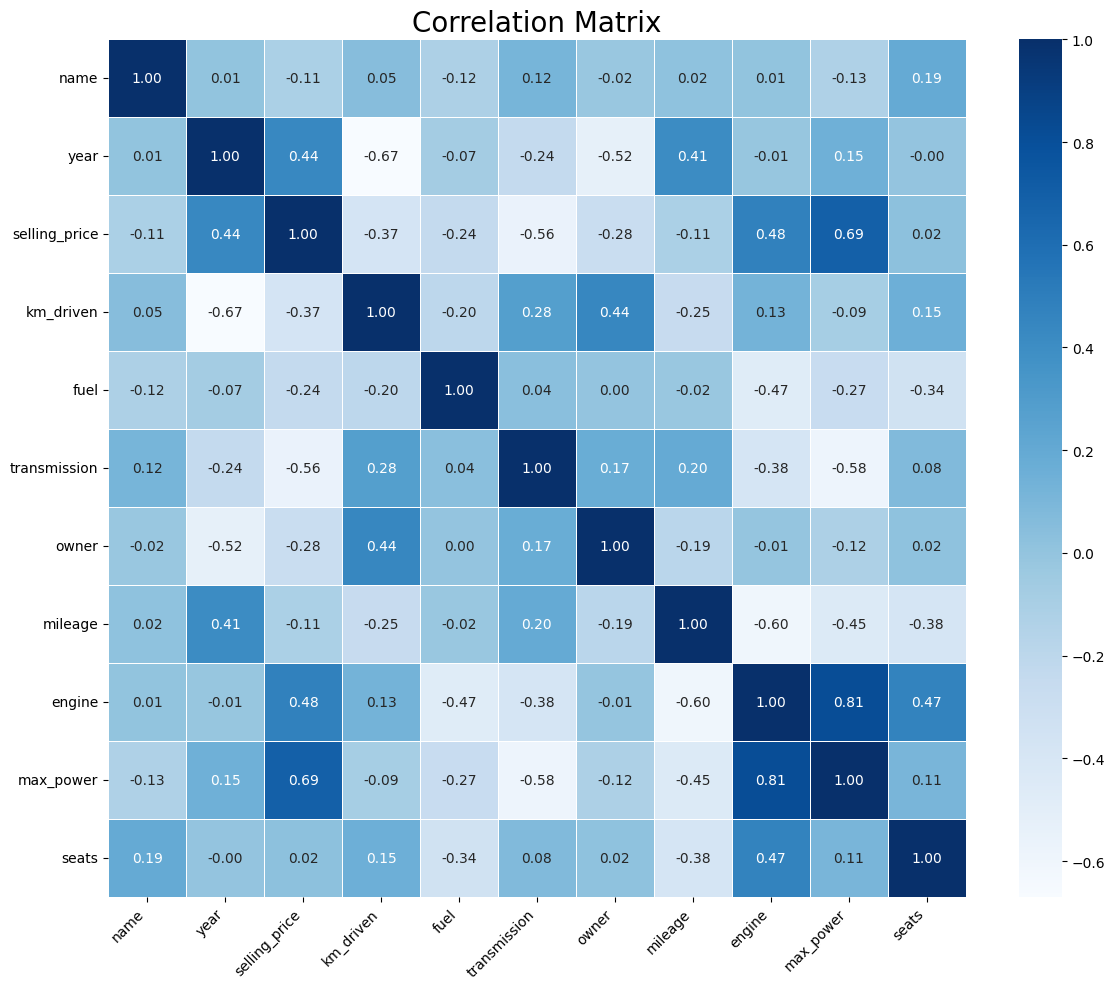

In [9]:
draw_correlation_matrix(df_2017_2015, figsize=(12, 10))
draw_correlation_matrix(df_2014_2012, figsize=(12, 10))
draw_correlation_matrix(df_others, figsize=(12, 10))

In [10]:
def plot_correlation_with_price(df, figsize=(12, 6)):
    """
    Plot the correlation of features with the selling price.

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        figsize (tuple): Figure size (default is (12, 6)).

    Returns:
        None (Displays the plot).
    """
    plt.figure(figsize=figsize)
    
    # Calculate the correlation matrix
    correlation_matrix = df.corr()
    
    # Get the correlation of all features with 'selling_price'

    corr_with_price = correlation_matrix['selling_price'].drop('selling_price').sort_values(ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=corr_with_price.index, y=corr_with_price.values, 
                hue=corr_with_price.index, palette='Blues_d')

    plt.title('Correlation of Features with Selling Price', fontsize=16, pad=20)

    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Correlation Coefficient', fontsize=12)

    plt.xticks(rotation=45, ha='right', fontsize=10)

    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

<Figure size 1200x600 with 0 Axes>

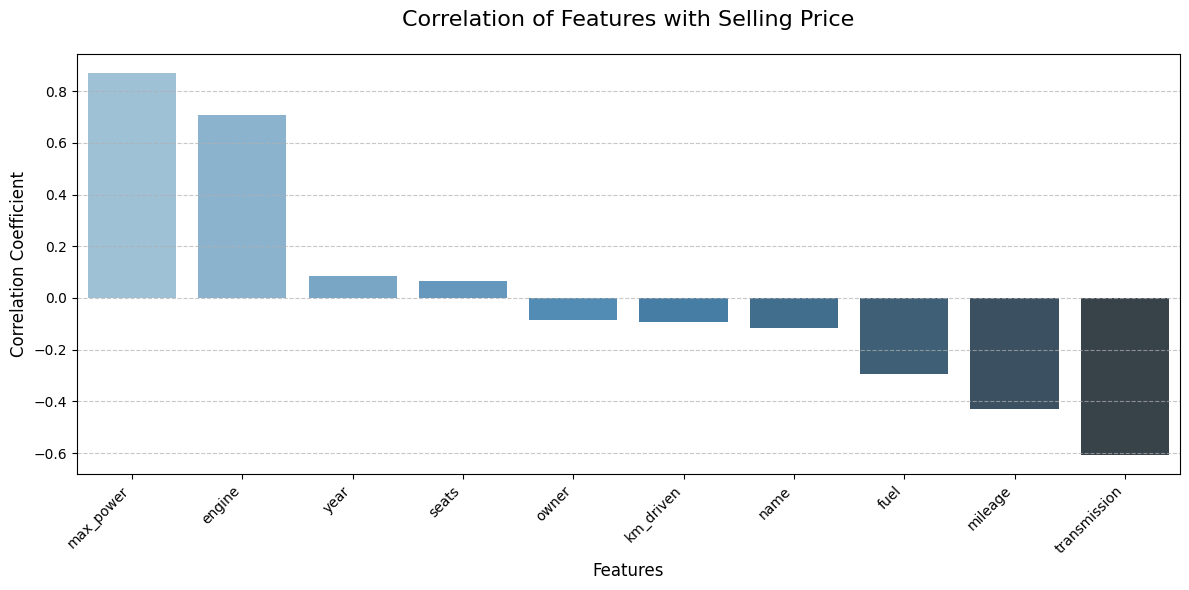

<Figure size 1200x600 with 0 Axes>

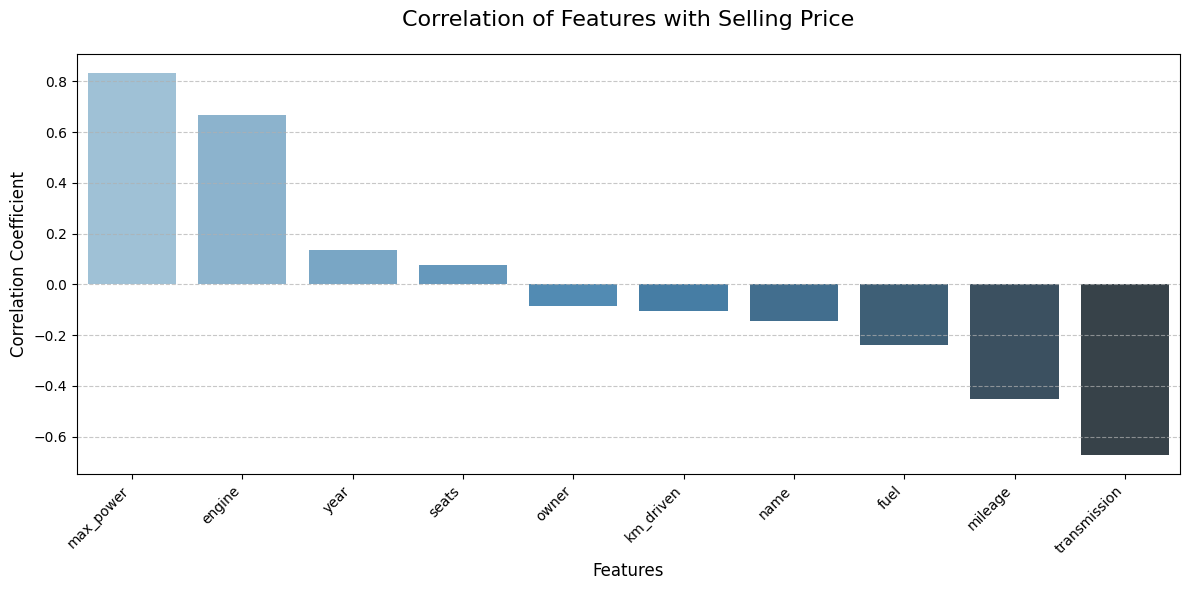

<Figure size 1200x600 with 0 Axes>

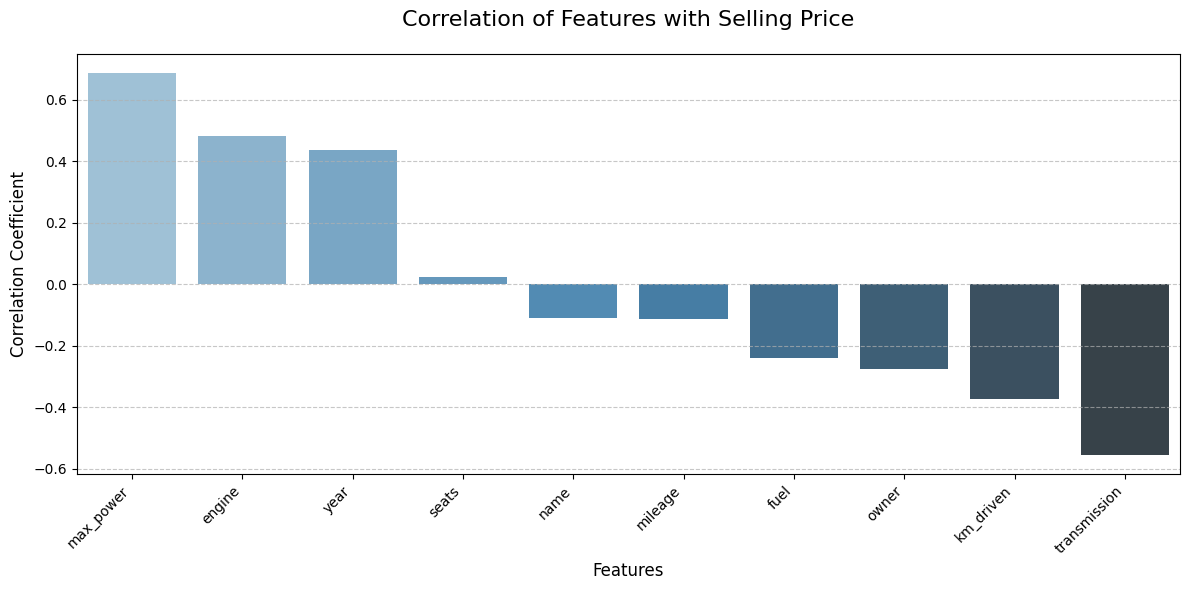

In [11]:
plot_correlation_with_price(df_2017_2015, figsize=(12, 6))
plot_correlation_with_price(df_2014_2012, figsize=(12, 6))
plot_correlation_with_price(df_others, figsize=(12, 6))

# Car price prediction

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
# Split data into input and label data
X_2017_2015 = df_2017_2015.drop(columns = ['selling_price'])
Y_2017_2015 = df_2017_2015['selling_price']
print(f'size of input data {X_2017_2015.shape}')
print(f'size of input data {Y_2017_2015.shape}')



size of input data (5294, 10)
size of input data (5294,)


In [15]:
# Split data into train and test data
x_train_2017_2015, x_test_2017_2015, y_train_2017_2015, y_test_2017_2015 = train_test_split(X_2017_2015, Y_2017_2015, test_size = 0.12)
print(f'x train size {x_train_2017_2015.shape}, x test size {x_test_2017_2015.shape}')
print(f'y train size {y_train_2017_2015.shape}, y test size {y_test_2017_2015.shape}')

x train size (4658, 10), x test size (636, 10)
y train size (4658,), y test size (636,)


In [16]:
# Normalize data (fit on train, transform on test)
scaler_2017_2015 = StandardScaler()
x_train_scaled_2017_2015 = scaler_2017_2015.fit_transform(x_train_2017_2015)
x_test_scaled_2017_2015 = scaler_2017_2015.transform(x_test_2017_2015)

In [17]:
# Create all models
models = {
    'Linear Regression': LinearRegression(), 
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVM': SVR()
}

In [18]:
results = []
best_model = None
best_model_name = None
best_mse = float('inf')

# Iterate over each model in the models dictionary
for name, model in models.items():
    # Fit the model on the scaled training data
    model.fit(x_train_scaled_2017_2015, y_train_2017_2015)
    
    # Predict on training and testing datasets
    train_pred_2017_2015 = model.predict(x_train_scaled_2017_2015)
    test_pred_2017_2015 = model.predict(x_test_scaled_2017_2015)
    
    # Calculate evaluation metrics for training data
    train_mse = mean_squared_error(y_train_2017_2015, train_pred_2017_2015)
    
    # Calculate evaluation metrics for testing data
    test_mse = mean_squared_error(y_test_2017_2015, test_pred_2017_2015)
    
    # Append all metrics to results list
    results.append({
        'Model': name,
        'Train MSE': train_mse,
        'Test MSE': test_mse
    })
    
    # Update the best model based on Test MSE
    if test_mse < best_mse:
        best_mse = test_mse
        best_model = model
        best_model_name = name

# Create a DataFrame to display results
df_results_2017_2015 = pd.DataFrame(results)
df_results_2017_2015

,Model,Train MSE,Test MSE
0,Linear Regression,20.334438,16.326973
1,Ridge,20.334448,16.325510
2,Lasso,23.128839,17.047529
3,Decision Tree,0.022586,7.472643
4,KNN,8.952286,18.837719
5,Random Forest,1.402153,3.742617
6,SVM,21.388962,19.490361


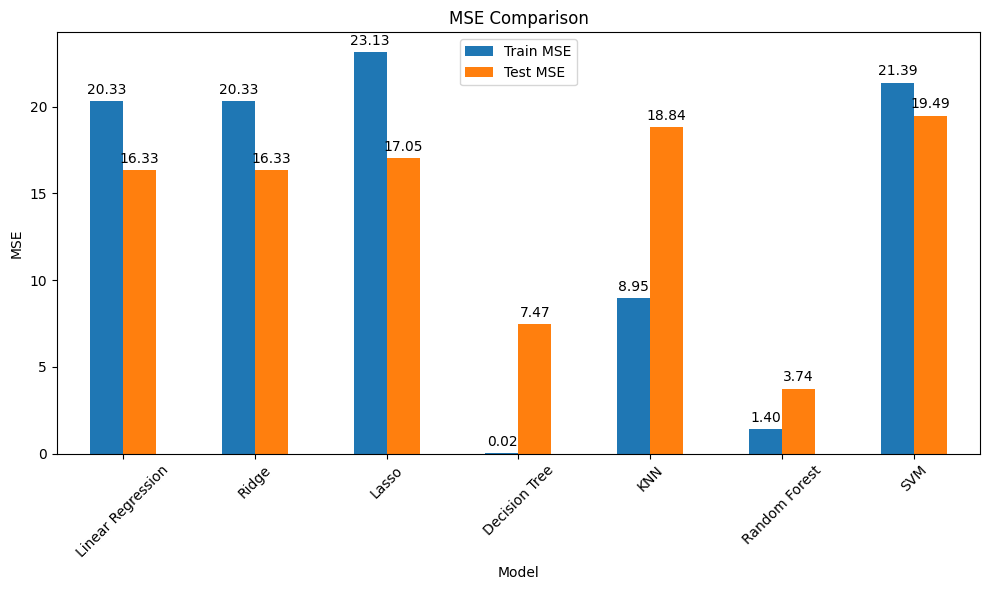

In [20]:
# Define the metric and corresponding DataFrame columns
metric_name, train_col, test_col = ('MSE', 'Train MSE', 'Test MSE')

# Create a single subplot
fig, ax = plt.subplots(figsize=(10, 6))

# Set Model as index and select the current metric columns
df_plot = df_results_2017_2015.set_index('Model')[[train_col, test_col]]

# Plot the bar chart for the metric
df_plot.plot(kind='bar', ax=ax, rot=45, title=f"{metric_name} Comparison")

# Add data labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)

# Set the y-axis label
ax.set_ylabel(metric_name)

plt.tight_layout()
plt.show()


In [25]:
import joblib
joblib.dump(best_model, "best_model_2017_2015.pkl")
print(f"Saved {best_model_name} to best_model_2017_2015.pkl")

# Load model
loaded_model = joblib.load("best_model.pkl")
# Predict
predictions = loaded_model.predict(x_test_scaled_2017_2015)

Saved Random Forest to best_model_2017_2015.pkl


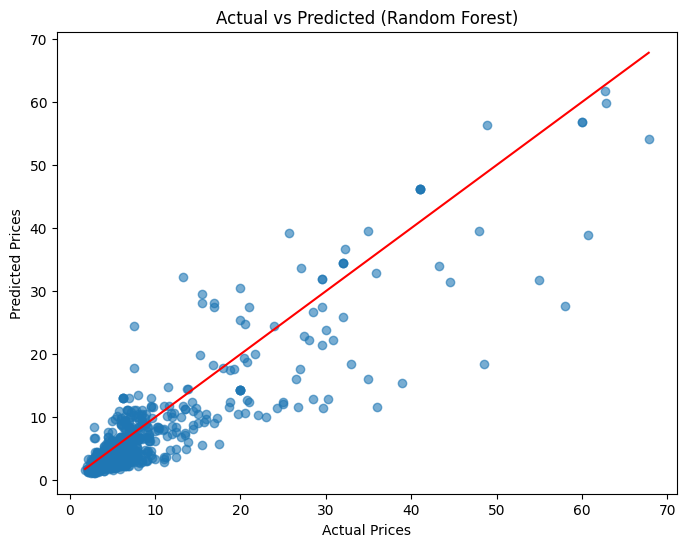

In [27]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_2017_2015, predictions, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title(f"Actual vs Predicted ({best_model_name})")
plt.plot([min(y_test_2017_2015), max(y_test_2017_2015)], [min(y_test_2017_2015), max(y_test_2017_2015)], color='red')
plt.show()


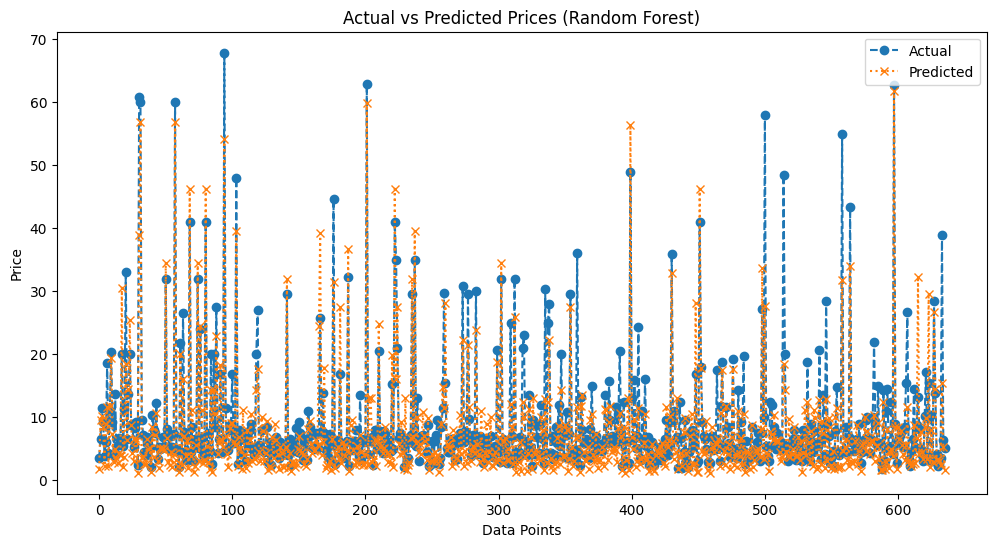

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(y_test_2017_2015.values, label="Actual", marker='o', linestyle='dashed')
plt.plot(predictions, label="Predicted", marker='x', linestyle='dotted')
plt.xlabel("Data Points")
plt.ylabel("Price")
plt.title(f"Actual vs Predicted Prices ({best_model_name})")
plt.legend()
plt.show()
